# The Period of an Anharmonic Oscillator

### Part a) calcualting the formula for the period

\begin{equation*}
E = \frac{1}{2}m\big(\frac{dx}{dt}\big)^2 + V(x)
\end{equation*}

\begin{equation*}
E - V(x) = \frac{1}{2}m\big(\frac{dx}{dt}\big)^2
\end{equation*}

\begin{equation*}
\frac{2(E - V(x))}{m} = \big(\frac{dx}{dt}\big)^2
\end{equation*}

\begin{equation*}
\frac{dx}{dt} = \sqrt{\frac{2(E - V(x))}{m}}
\end{equation*}

\begin{equation*}
x = \int_{0}^{\frac{T}{4}}\sqrt{\frac{2(E - V(x))}{m}}dt
\end{equation*}

\begin{equation*}
x = \sqrt{\frac{2(E - V(x))}{m}} \frac{T}{4}
\end{equation*}

\begin{equation*}
T = \frac{4 \sqrt{m} x}{\sqrt{2(E-V(x))}}
\end{equation*}

\begin{equation*}
T = \sqrt{8m}\frac{x}{\sqrt{E-V(x)}}
\end{equation*}

$since \space E = V(a)$

\begin{equation*}
T = \sqrt{8m}\int_{0}^{a}\frac{dx}{\sqrt{V(a)-V(x)}}
\end{equation*}


### Part b) exampe of calculating period

In [1]:
%matplotlib inline
import math
import numpy as np
import pylab as plt
from romberg import romberg

def V (x):
    """Returns the potnential at a given x position
    
    Arguements: x - distnace from the center
    
    Returned: x^4 - the potential funciton"""
    
    return x**4

def integrationFunc (x):
    """Returns the function to be integrated
    
    Arguements: x - distnace from the center
    
    Returned: the function that is integrated in the period calcualtion"""
    
    return 1 / math.sqrt(V(amplitude)-V(x))
    
def periodCalculation (Vofx, mass, amplitude, tolerance):
    """Returns the period of the oscillator given an amplitude
    
    Arguements: Vofx - potential function
                mass - mass of the particle
                amplitude - amplitude of particle's oscillation
                tolerance - accuracy of integration
    
    Returned: period - the period of oscillation"""
    
    period = math.sqrt(8 * mass) * romberg(Vofx,(0,amplitude-1e-6),tolerance)
    
    return period
            

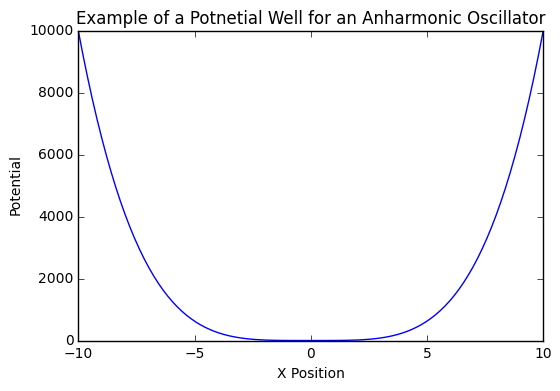

In [6]:
xPosition = []
potential = []

for i in np.linspace (-10, 10, 100):
    xPosition.append(i)
    potential.append(V(i))
    
plt.title("Example of a Potnetial Well for an Anharmonic Oscillator")    
plt.xlabel("X Position")
plt.ylabel("Potential")
plt.plot(xPosition, potential)

This plot is an example of the potential well for an anharmonic oscillator. Hamonic oscillators follow a parabolic potential well, with potential ~ x^2. This potenial well has potential ~ x^4, which causes the period to vary based on amplitude.

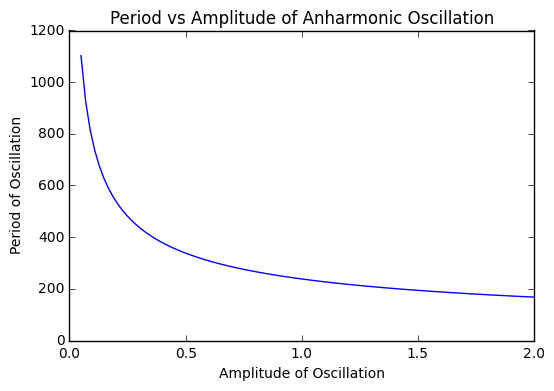

In [7]:
periods = []
amplitudes = []

# Creates period and amplitude arrays
for a in np.linspace (0.05, 2, 100): # Starts at 0.05 because the function approaches infinity as a -> 0
    amplitude = a
    periods.append(periodCalculation (integrationFunc, 1, a, 1e10))
    amplitudes.append(a)

plt.title("Period vs Amplitude of Anharmonic Oscillation")    
plt.xlabel("Amplitude of Oscillation")
plt.ylabel("Period of Oscillation")
plt.plot(amplitudes, periods)

### Part c) explaining the results

From the above plot, we can see that the period increases as amplitude approaches zero, and approaches zero as the amplitude increases. This is because the potential at position x is equal to $x^4$. In a regular harmonic oscillator, the potential function is $x^2$, and the period is not affected by the amplitude. Compared to a harmonic potential well, a well that follows an $x^4$ pattern has a smaller slope as x approaches zero, and a larger slope when x is greater than one. This makes it so that when x is small, the change in potential is small, so one period will take longer. And when x is large, the change in potential is large, so one period will take less time. 

## Notes

### Real Life Examples:

Most systems are anharmonic when they are uinder extreme conditions. Here are some that might be interesting to study:  
https://journals.aps.org/pr/pdf/10.1103/PhysRev.184.1231  
https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.47.1349  
https://www.youtube.com/watch?v=fBKZKQnJTY8

* Plasma  
    https://journals.aps.org/pr/pdf/10.1103/PhysRev.113.383
* Center of mass of a nucleus in an atom
* Crystal lattuces  
    https://journals.aps.org/pr/pdf/10.1103/PhysRev.144.411
* Acoustics
* Large angle Pendulum
* Nonequalibrium semi conductors  
    https://journals.aps.org/prb/pdf/10.1103/PhysRevB.37.1273